# Data Science Mathematics
# Social Network Analysis
# In-Class Activity

Refer to the handout for a description of this activity.

You will analyze the two ego graphs provided.  One is a known Russian bot, and the other is unknown.  Based on graph resonance, determine if the unknown graph is likely to be a military person.  You will also calculate the clustering coefficients for each graph, and enumerate the communities.

First, import the relevant libraries.

In [1]:
import networkx as nx
import pickle
import os
import math
import matplotlib.pyplot as plt
import numpy as np

The graph objects have been serialized.  Build a function to load them into memory using pickle.

In [2]:
#open pickle file
def open_pickle(pickle_path):
    with open(pickle_path, 'rb') as pickle_file:
        object_name = pickle.load(pickle_file)
    return object_name

You will have to calculate the resonance for all vertices in your ego graphs.  Define a function to calculate the betweenness centralities for all vertices.

In [3]:
#Get betweenness centrality
def spectrum(G):
    centrality = nx.betweenness_centrality(G)
    return centrality

Now, define a function for calculating graph resonance.

In [4]:
#Calculate graph resonance between graphs G1 and G2, with resonances S1 and S2, respectively
def resonate(G1, S1, G2, S2):
    res_divisor_1 = sum([a**2 for a in S1.values()])
    res_divisor_2 = sum([a**2 for a in S2.values()])
    res_divisor = math.sqrt(res_divisor_1*res_divisor_2)
    if res_divisor == 0:
        resonance = 0.0
    else:
        G1_nodes = G1.nodes()
        G2_nodes = G2.nodes()
        G_intersect = list(set(G1_nodes) & set(G2_nodes))
        if len(G_intersect) != 0:
            S1_list = [S1[node] for node in G_intersect]
            S1_array = np.array(S1_list)
            S2_list = [S2[node] for node in G_intersect]
            S2_array = np.array(S2_list)
            resonance_raw = np.dot(S1_array, S2_array)
            resonance = resonance_raw/res_divisor
        else:
            resonance = 0.0
    return resonance

It is important to know the clustering coefficients for each graph.  You should define a function for that.

In [5]:
#Calculate clustering coefficient for graph G
def clustering_coeff(G):
    c = nx.average_clustering(G)
    return c

You will also want to enumerate the communities in each graph.  Let's define a function to use the Clauset-Newman-Moore algorithm for community detection.

In [6]:
#Community detection
def get_communities(G):
    from networkx.algorithms.community import greedy_modularity_communities
    communities = list(greedy_modularity_communities(G))
    return communities

Now that you've defined all your functions, let's import the graphs.  Specify the absolute paths of your ego graphs.

In [8]:
#Note that you have to specify the absolute paths yourself for the graphs associated with this exercise
#Here is an example:
#r'C:\Directory1\Directory2\File_Name.pkl'

known_bot_path = r'/home/EDSE-jeremymk-workspace/MST690/mathematics/known_bot2_Session7.pkl'
unknown_path_1 = r'/home/EDSE-jeremymk-workspace/MST690/mathematics/known_bot2_Session7.pkl'

Now let's load each graph.

In [9]:
known_bot = open_pickle(known_bot_path)
unknown_1 = open_pickle(unknown_path_1)

Let's explore our graphs a bit.  How many nodes (vertices) are in each one?  What does this mean?

In [11]:
print('Vertices in Known Bot: {}'.format(len(known_bot.nodes())))
print('Vertices in Unknown 1: {}'.format(len(unknown_1.nodes())))

Vertices in Known Bot: 543
Vertices in Unknown 1: 543


Let's also plot slices of each graph.  But first, we need to induce subgraphs from each graph because there are probably too many vertices to make a good plot.

In [12]:
#Get slices (subsets) of each edge set.
known_bot_end = int(0.1*len(known_bot.edges()))
unknown_1_end = int(0.1*len(unknown_1.edges()))
known_bot_edges_slice = list(known_bot.edges())[0:known_bot_end]
unknown_1_edges_slice = list(unknown_1.edges())[0:unknown_1_end]

#Induce subgraphs
KB_sub = known_bot.edge_subgraph(known_bot_edges_slice)
U1_sub = unknown_1.edge_subgraph(unknown_1_edges_slice)

The known bot graph is quite large and will take a while to draw, so we will skip that one for now.

Let's plot the unknown 1 graph.

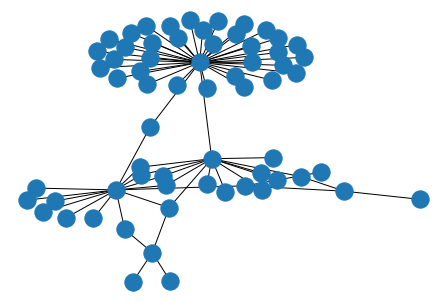

In [13]:
nx.draw(U1_sub)
plt.show()

Now plot the known bot graph in the line below:

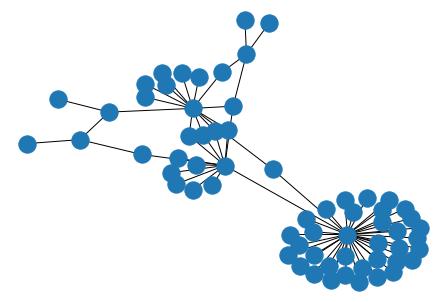

In [14]:
nx.draw(KB_sub)
plt.show()

Now that you've loaded the graphs into memory, you need to calculate the centralities for each vertex in each graph.

In [15]:
known_bot_centralities = spectrum(known_bot)
unknown_1_centralities = spectrum(unknown_1)

Now calculate the clustering coefficients for each graph.

In [16]:
known_bot_cluster = clustering_coeff(known_bot)
unknown_1_cluster = clustering_coeff(unknown_1)

Let's analyze the clustering coefficients.  How similar are they?  What do they tell you about each graph?

In [17]:
print('Known Bot Clustering Coefficient: {}'.format(known_bot_cluster))
print('Unknown 1 Clustering Coefficient: {}'.format(unknown_1_cluster))

Known Bot Clustering Coefficient: 0.20371874907173476
Unknown 1 Clustering Coefficient: 0.20371874907173476


Now we need to calculate the resonance between the graphs.  We have already calculated the betweenness centralites for each, which is required for the resonance calculation.  What does the resonance tell us?

In [18]:
#Resonance between Known Bot and Unknown 1
K_1_res = resonate(known_bot, known_bot_centralities, unknown_1, unknown_1_centralities)

Now let's examine our resonance output.

In [19]:
print('Resonance between Known Bot and Unknown 1: {}'.format(K_1_res))

Resonance between Known Bot and Unknown 1: 1.0000000000000002


Now let's explore the communities in each graph.

In [20]:
Known_Bot_Communities = get_communities(known_bot)
Unknown_1_Communities = get_communities(unknown_1)

Now, let's examine our communities output.

In [21]:
print('Known Bot Communities')
for community in Known_Bot_Communities:
    print(len(community))
print('=====================')

print('Unknown 1 Communities')
for community in Unknown_1_Communities:
    print(len(community))

Known Bot Communities
240
143
75
46
39
Unknown 1 Communities
240
143
75
46
39


Use your output to answer the questions on the activity handout.

###You are an OSINT analyst wit hthe CIA, and you have been assigned a Russian bot network to analyze. You want to develop an algorithm for bot community detection based on ego graph similarity. _You hypothesize that bots will follow similar people, and thus will have similar ego networks._

> Answer the following:

###a) What metric will allow you to quantify the similarity between graphs?

In [ ]:
Resonance allows us to easily determine similarity between graphs on a scale of 0 (completely dissimilar) to 1 (identical).

###b) Using the Python notebook provided, calculate the network centralities, clustering coefficients, and resonance; enumerate the communities within the ego graphs provided.

See above code - results (minus centralities, which would be crazy to print) are as follows:

In [23]:
print('Known Bot Clustering Coefficient: {}'.format(known_bot_cluster))
print('Unknown 1 Clustering Coefficient: {}'.format(unknown_1_cluster))

Known Bot Clustering Coefficient: 0.20371874907173476
Unknown 1 Clustering Coefficient: 0.20371874907173476


In [24]:
print('Resonance between Known Bot and Unknown 1: {}'.format(K_1_res))

Resonance between Known Bot and Unknown 1: 1.0000000000000002


In [25]:
print('Known Bot Communities')
for community in Known_Bot_Communities:
    print(len(community))
print('=====================')

print('Unknown 1 Communities')
for community in Unknown_1_Communities:
    print(len(community))

Known Bot Communities
240
143
75
46
39
Unknown 1 Communities
240
143
75
46
39


###c) One of the ego networks is from a known bot, and the other is unknown. Based on your analysis, is the unknown network likely to be a bot?

Yes, it appears likely to be a bot; the resonance is near-perfect the clustering coefficient and communities are identifcal.

###d) Ego graphs are constructed from social connections, in this case, Twitter followers.

- **Do you think your hypothesis is a reasonable one, i.e. is Twitter follower status a sufficient indicator of a true connection? Why or why not, or does it depend on other factors?**

It seems like a reasonable measure of connection solely within the domain of Twitter, based off of a given graph resonance - there is no one "right" answer because it depends on the application you are seeking and the level of risk associated with the given decisions. If you want to target a specific Twitter account for some sort of action based solely on connections, the action should have an associated level of risk, which, combined with the level of resonance and other contextual factors, will suggest an approach (e.g. do you watchlist an account because it seems to be part of a network, or do you attempt something more intrusive because it seems to be associated with illegal or violent actions with immediate consequences - each context has different risk levels). 

Extrapolating connection beyond that domain to attempt to understand external relationships (e.g. do these connections exist in addition to some other kind of relationship) would benefit from additional analysis of specific interactions between accounts and other factors.

- **Are there other methods of generating graph edges that might better represent a possible relationship? Explain your reasoning.**

Interactions between accounts / nodes and each other or certain other accounts seems like another approach, e.g. if I see two accounts that are both retweeting another account (or series of accounts) with relative frequency, or similar language, then measuring those features might provide another means of identifying connections. The same might be said of features like the time they are active / inactive, whether they are using some form of non-native URL shortening, etc. - whether those would be "better" seems like it would need to be contextualized, so a universal answer is unlikely.

***Now save your output.  Go to File -> Print Preview and save your final output as a PDF.  Turn in to your Instructor, along with any additional sheets.